Name: JOEL RAJU

Batch: R1

Date: 07-03-2023

Experiment Name: 3.1 Forecasting Stock market Price : Google Stock Price Data

Experiment Description: The experiment aims at designing a RNN model to predict the next week
google stock price based on three week input data.

Stock Price prediction for next 'n' days using LSTM

In [ ]:
#Importing some libraries.
import numpy as np
import keras as ks
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler

I am using the stock prices of another company "Google"

In [ ]:
# Import google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
Google_Data=pd.read_csv("/content/gdrive/MyDrive/DNN/Google_Stock_Price_Train[1].csv")

In [ ]:
type(Google_Data)

pandas.core.frame.DataFrame

In [ ]:
Google_Data.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
len(Google_Data)

1509

In [ ]:
Google_Data.tail()

,Date,Open,High,Low,Close,Volume
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.73999,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100
1508,29/12/2017,1046.719971,1049.699951,1044.900024,1046.400024,887500


In [ ]:
#taking the open price of data
open=Google_Data[['Open']]

Plotting the open Price of Google

<Axes: >

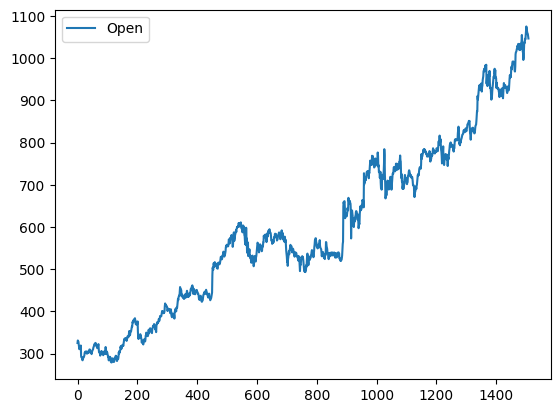

In [ ]:
open.plot()

In [ ]:
#convert the open prices to numpy array using dot function
ds=open.values
ds

array([[ 325.25    ],
       [ 331.27    ],
       [ 329.83    ],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [ ]:
#By using MinMaxscaler normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled=normalizer.fit_transform(np.array(ds).reshape(-1,1))

Train and test size

In [ ]:
#Define test and train data sizes
#70% for train
#30% for test
train_size=int(len(ds_scaled)*0.70)
test_size=len(ds_scaled)-train_size

In [ ]:
train_size,test_size

(1056, 453)

Splitting the data to train and test

In [ ]:
#splitting data : train and test
ds_train,ds_test=ds_scaled[0:train_size,:],ds_scaled[train_size:len(ds_scaled),:1]

In [ ]:
len(ds_train),len(ds_test)

(1056, 453)

In [ ]:
#creating dataset in time series for LSTM model
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [ ]:
#Here Iam taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [ ]:
X_train.shape,y_train.shape

((955, 100), (955,))

In [ ]:
X_test.shape, y_test.shape

((352, 100), (352,))

In [ ]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Modelling

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
15/15 [==============================] - 12s 313ms/step - loss: 0.0237 - val_loss: 0.0835
Epoch 2/100
15/15 [==============================] - 3s 205ms/step - loss: 0.0036 - val_loss: 0.0219
Epoch 3/100
15/15 [==============================] - 3s 222ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 4/100
15/15 [==============================] - 6s 422ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/100
15/15 [==============================] - 3s 201ms/step - loss: 8.6291e-04 - val_loss: 0.0016
Epoch 6/100
15/15 [==============================] - 3s 198ms/step - loss: 8.4008e-04 - val_loss: 0.0018
Epoch 7/100
15/15 [==============================] - 4s 251ms/step - loss: 8.4206e-04 - val_loss: 0.0015
Epoch 8/100
15/15 [==============================] - 4s 288ms/step - loss: 8.0781e-04 - val_loss: 0.0022
Epoch 9/100
15/15 [==============================] - 3s 199ms/step - loss: 7.8979e-04 - val_loss: 0.0017
Epoch 10/100
15/15 [==============================] - 3s 199ms/step - 

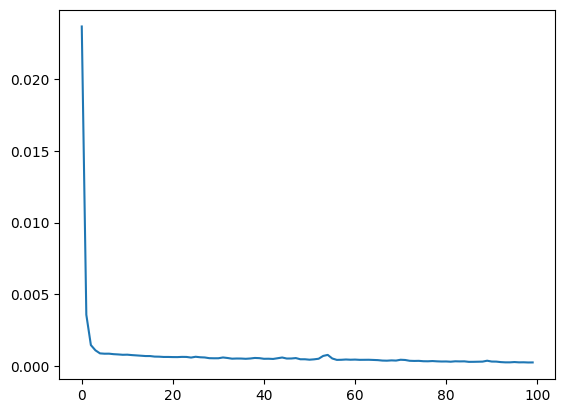

In [ ]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [ ]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 60ms/step


In [ ]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

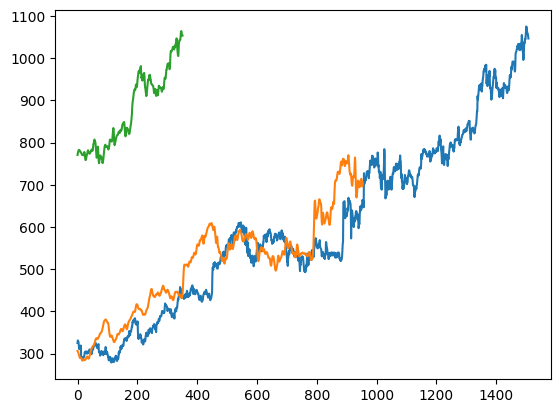

In [ ]:
#Comparing using visuals
#blue=actual data
#orange=predicted value of train data
#green=predicted value of test data
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [ ]:
type(train_predict)

numpy.ndarray

In [ ]:
test = np.vstack((train_predict,test_predict))

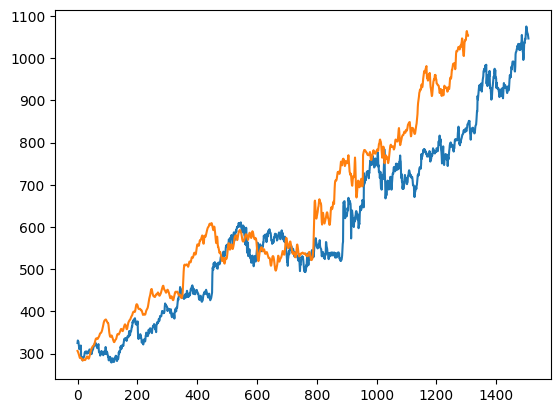

In [ ]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)